# How are in-demand skills trending for Data Analyst?

#### Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

### Importing Library and Data

In [1]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Analysis For Unites States

### Group the Skills by Month
Select only those job postings that are for **Data Analysts** and the job country is the **United States**.

Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [8]:
# Skill count per month for data analyst.
df_DA_US =  df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode the job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

#### Pivot in Prep for Plotting
Create a pivot table from the `df_DA_US_explode`, setting 'month' as the index, `job_skills` as the columns, and fills missing entries with zero.

In [18]:
# Group by job_skills and month number.
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,dart,databricks,...,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,42,10,1,400,363,31,101,35,0,173,77,103,1,7,0,5,0,0,7,1,154,1,111,1,2,0,117,36,3,106,...,1,167,188,0,1,8,6,84,2488,26,32,5,0,0,2,6,0,2,0,8,10,127,0,7,257,191,63,4,1,0,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,28,9,4,314,287,11,55,3,1,111,88,57,0,7,0,5,0,0,4,0,100,0,57,2,0,0,95,32,2,66,...,0,176,164,0,0,13,0,57,1676,12,32,3,0,0,2,4,3,0,0,4,3,50,0,6,164,148,79,2,9,0,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,25,12,4,292,248,19,58,0,0,100,54,66,0,10,0,0,3,0,6,0,119,1,78,3,0,0,78,36,0,47,...,1,108,126,0,0,10,0,75,1804,13,26,4,0,0,2,1,4,0,0,9,3,63,1,9,188,127,78,3,6,0,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,11,11,7,317,233,27,51,10,0,100,52,96,0,12,0,5,0,3,12,0,103,0,60,0,0,1,82,26,0,68,...,0,112,129,0,0,16,0,72,1789,9,34,5,0,0,1,2,0,1,0,12,4,47,0,6,211,133,75,8,4,0,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,19,4,10,210,182,9,36,4,1,105,78,67,0,3,0,0,0,1,10,0,92,0,49,1,0,0,76,23,1,62,...,0,87,86,0,3,4,2,55,1432,8,32,2,0,0,0,2,0,1,6,9,5,23,0,0,134,137,49,3,3,0,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,22,8,5,281,240,29,39,8,0,101,74,52,0,10,0,1,0,0,10,0,97,1,50,8,3,0,77,39,4,85,...,2,131,125,0,1,6,1,57,1628,7,17,3,0,0,2,0,0,5,0,17,3,65,0,4,192,160,45,6,1,0,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,20,12,13,274,228,12,53,9,0,105,37,65,0,10,0,1,0,0,8,0,105,0,52,2,0,0,68,23,1,76,...,1,82,117,0,1,2,2,46,1533,18,23,4,0,1,4,1,0,3,0,3,6,28,1,5,170,132,41,5,1,0,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,28,17,26,349,250,18,65,13,0,170,62,94,0,3,0,2,0,2,0,0,118,0,68,1,1,0,81,34,3,85,...,1,110,148,0,0,7,7,73,1951,26,22,1,0,0,5,3,0,0,2,7,7,54,0,3,237,162,34,5,0,0,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,16,7,17,265,190,14,33,6,0,104,41,60,0,7,0,2,0,0,9,0,77,0,38,3,3,0,59,30,1,61,...,0,70,101,0,3,3,2,35,1353,12,14,5,0,0,0,1,2,2,0,2,8,34,1,2,127,101,41,6,1,1,0,4,80,4,478,0,0,0,1,12


### Sort columns by count and change month numbers to names
It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [20]:
# Sort by count
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,clojure,mxnet,sqlserver,elixir,nuix,heroku,ruby on rails,svelte,laravel,electron,blazor,mlr,unreal,lua,erlang,shogun,yarn,colocation,clickup,f#,tidyr,vue.js,hugging face,next.js,chainer,theano,codecommit,capacitor,couchdb,qt,asp.net core,ionic,openstack,google chat,microsoft lists,fastapi,gtx,xamarin,kotlin,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,575,514,400,386,443,289,363,306,286,321,349,206,257,236,230,216,243,191,188,189,173,170,167,188,151,154,128,146,106,80,...,0,0,1,0,0,2,1,0,0,0,0,1,0,0,0,3,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,405,414,314,278,286,281,287,224,232,182,183,203,164,148,157,150,160,148,164,159,111,105,176,129,79,100,103,113,66,92,...,0,1,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,343,304,292,281,271,247,248,248,238,204,206,219,188,143,179,139,156,127,126,119,100,99,108,102,78,119,91,117,47,76,...,0,1,1,0,0,1,0,0,0,0,0,1,1,2,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,361,328,317,313,336,280,233,219,217,206,194,208,211,195,144,155,163,133,129,138,100,138,112,101,104,103,112,98,68,86,...,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,306,265,210,305,282,200,182,183,170,137,134,144,134,149,163,137,109,137,86,133,105,89,87,109,105,92,89,76,62,67,...,1,1,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,287,297,281,293,278,270,240,194,189,187,166,188,192,135,137,145,118,160,125,119,101,111,131,116,109,97,82,74,85,69,...,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
7,2609,2118,1533,1438,996,881,881,587,549,401,296,301,274,271,222,223,228,185,145,151,146,160,170,157,150,170,107,132,117,88,105,117,82,84,103,105,85,78,76,59,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,437,338,349,300,293,271,250,262,228,228,228,187,237,183,180,225,126,162,148,124,170,138,110,106,142,118,106,98,85,87,...,2,0,1,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,295,264,265,233,207,221,190,191,180,165,150,145,127,146,152,143,99,101,101,76,104,75,70,66,83,77,90,60,61,80,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Plot the Monthly Skill Counts
Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

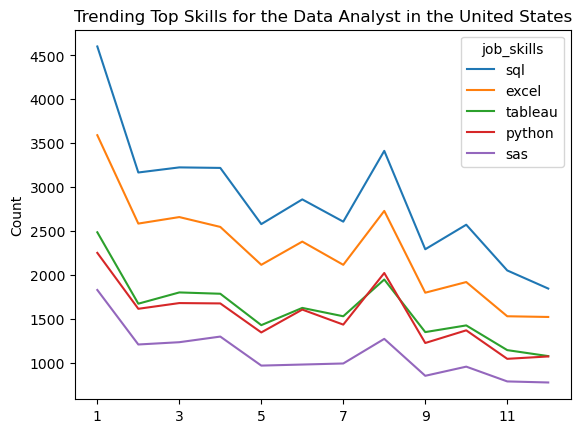

In [23]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title("Trending Top Skills for the Data Analyst in the United States")
plt.xlabel('')
plt.ylabel('Count')
plt.show()

This is good but totals can be misleading without context.

Percentages clarify relationships within the whole, giving a more accurate comparison.

### Calculate Percentage of Total Jobs
Calculates the total number of entries for each month in `df_DA` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `DA_totals`. This is needed to compute the percentages.

In [24]:
# Get monthly totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the `df_DA_pivot` DataFrame, which contains skill counts, by the monthly totals in `DA_totals` and multiplying by 100. The new DataFrame, `df_DA_pivot_percent`, shows skill distributions as percentages of total monthly job entries.

In [33]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_pivot_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

df_DA_pivot_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,clojure,mxnet,sqlserver,elixir,nuix,heroku,ruby on rails,svelte,laravel,electron,blazor,mlr,unreal,lua,erlang,shogun,yarn,colocation,clickup,f#,tidyr,vue.js,hugging face,next.js,chainer,theano,codecommit,capacitor,couchdb,qt,asp.net core,ionic,openstack,google chat,microsoft lists,fastapi,gtx,xamarin,kotlin,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.000000,0.000000,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032658,0.000000,0.016329,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.016082,0.016082,0.000000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.016082,0.032165,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.049595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,1.241738,1

In [35]:
# Changes month no to month name
df_DA_pivot_percent = df_DA_pivot_percent.reset_index()
df_DA_pivot_percent['job_posted_month'] = df_DA_pivot_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot_percent = df_DA_pivot_percent.set_index('job_posted_month')
df_DA_pivot_percent = df_DA_pivot_percent.drop(columns='job_posted_month_no')

df_DA_pivot_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,clojure,mxnet,sqlserver,elixir,nuix,heroku,ruby on rails,svelte,laravel,electron,blazor,mlr,unreal,lua,erlang,shogun,yarn,colocation,clickup,f#,tidyr,vue.js,hugging face,next.js,chainer,theano,codecommit,capacitor,couchdb,qt,asp.net core,ionic,openstack,google chat,microsoft lists,fastapi,gtx,xamarin,kotlin,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.000000,0.000000,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032658,0.000000,0.016329,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.016082,0.016082,0.000000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.016082,0.032165,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.049595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,1.2

### Plot Monthly Skill Demand
Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the `df_DA_pivot_percent` DataFrame. Also the legend is moved outside of the plot for readability.

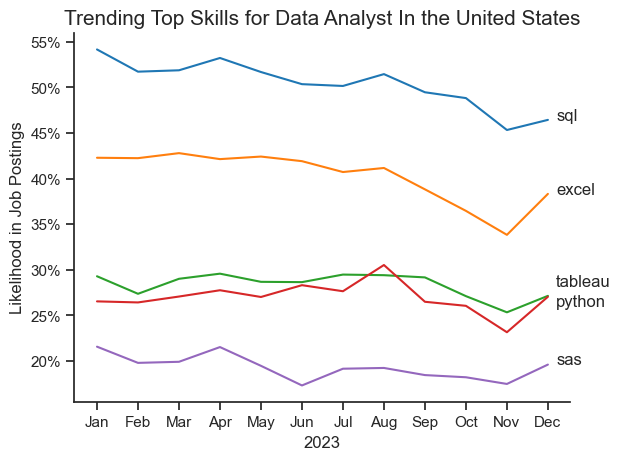

In [103]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_pivot_percent.iloc[:, :5]

sns.set_theme(style='ticks')

sns.lineplot(data=df_plot,
             dashes=False,
             palette='tab10')
sns.despine()
plt.title("Trending Top Skills for Data Analyst In the United States", fontsize=15)
plt.xlabel("2023")
plt.ylabel("Likelihood in Job Postings")
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()

# annotate the plot with the top 5 skills using plt.text()
# Also, # Adjust the y position slightly for each label to prevent overlap
for i in range(5):
    if df_plot.columns[i] == 'tableau':
        plt.text(11.2, df_plot.iloc[-1, i] + 1, df_plot.columns[i], ha='left')
    elif df_plot.columns[i] == 'python':
        plt.text(11.2, df_plot.iloc[-1, i] - 1, df_plot.columns[i], ha='left')
    else:
        plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], ha='left')

plt.show()

## Analysis for India

### Group the Skills by Month
Select only those job postings that are for **Data Analysts** and the job country is the **India**.

Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [67]:
# Skill count per month for data analyst.
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_IND['job_posted_month_no'] = df_DA_IND['job_posted_date'].dt.month

# Explode the job_skills column
df_DA_IND_explode = df_DA_IND.explode('job_skills')

#### Pivot in Prep for Plotting
Create a pivot table from the `df_DA_US_explode`, setting 'month' as the index, `job_skills` as the columns, and fills missing entries with zero.

In [70]:
# Group by job_posted_month_no and job_skills columns.
df_DA_IND_pivot = df_DA_IND_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Check the pivot table
df_DA_IND_pivot

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,c,c#,c++,cassandra,centos,chef,clickup,cognos,confluence,crystal,css,dart,databricks,datarobot,dax,db2,digitalocean,django,docker,dplyr,dynamodb,elasticsearch,electron,excel,express,...,sql,sql server,sqlite,ssis,ssrs,suse,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,21,1,0,0,0,1,0,0,0,32,46,4,11,4,9,4,3,5,0,0,0,5,6,0,4,0,10,0,11,3,0,5,3,0,1,0,1,218,7,...,305,28,0,19,7,0,1,2,0,3,159,5,1,0,0,0,0,0,1,0,0,0,1,16,0,0,20,12,1,0,0,0,1,4,1,37,0,0,0,3
2,7,17,1,0,2,0,0,1,0,1,33,26,0,13,1,4,3,4,0,0,0,0,8,3,0,2,1,9,1,6,3,0,1,4,0,0,0,0,156,4,...,209,17,0,10,10,0,0,4,1,0,116,4,0,1,0,0,1,0,0,0,0,0,1,6,0,0,15,5,2,0,0,1,1,5,0,24,0,0,0,0
3,6,16,2,1,0,0,0,1,1,0,38,45,3,11,2,5,4,3,3,0,0,0,4,4,0,2,0,16,0,9,3,0,0,0,3,0,2,0,138,3,...,229,18,0,6,7,1,0,1,0,6,125,3,1,2,0,1,0,0,0,0,0,0,1,11,0,0,13,7,0,1,0,0,0,5,0,27,0,0,0,2
4,8,8,1,0,4,0,1,2,0,0,31,40,3,12,4,10,3,8,1,0,0,0,0,4,0,2,0,13,0,12,3,0,2,3,1,1,2,0,138,3,...,204,27,0,10,3,0,1,3,0,2,98,2,0,1,0,0,0,0,0,0,0,2,0,10,0,0,13,6,1,0,0,0,1,4,0,27,0,0,0,1
5,5,13,0,0,1,0,0,0,0,0,22,33,1,1,0,6,2,0,2,1,0,0,2,1,2,0,0,7,0,6,3,0,0,0,0,0,0,0,106,5,...,155,11,0,7,3,0,0,1,0,1,71,1,0,0,0,0,0,0,0,0,0,3,1,5,1,1,12,0,1,1,0,0,0,5,0,13,0,0,0,0
6,5,22,1,0,0,0,1,0,0,1,32,37,6,8,3,4,3,3,2,0,0,0,0,2,0,3,2,9,0,3,0,0,0,1,1,1,2,0,115,5,...,193,16,0,11,7,0,0,3,0,0,114,2,0,0,0,0,0,0,0,0,0,1,0,2,0,0,10,1,2,2,0,0,0,1,0,12,1,0,0,1
7,10,13,2,0,1,0,0,0,0,1,31,39,0,12,0,3,8,3,2,0,0,0,1,1,1,4,0,9,0,12,2,1,4,1,1,2,1,1,174,4,...,245,23,0,16,6,0,1,1,0,5,124,5,1,1,0,1,1,1,0,0,0,1,1,5,0,1,25,3,2,1,0,4,0,4,0,22,0,0,0,2
8,19,25,2,0,0,0,0,0,2,0,63,52,1,9,5,8,4,6,6,0,0,0,6,7,0,2,0,20,0,14,1,1,2,5,0,1,1,0,192,1,...,317,28,0,17,16,0,0,1,0,11,152,3,1,3,0,0,0,1,0,0,1,0,1,7,0,0,18,7,1,1,0,1,0,4,0,31,0,0,1,1
9,4,14,0,0,0,2,0,0,1,5,41,35,1,8,2,6,2,4,2,0,0,0,3,8,1,5,0,22,0,13,10,0,3,2,0,1,5,0,228,6,...,341,14,0,10,5,0,1,0,0,0,195,4,0,1,2,0,0,1,0,0,0,1,0,8,0,0,12,10,0,2,0,0,0,2,0,28,0,0,1,2


### Sort columns by count and change month numbers to names
It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [84]:
# Sort the pivot table by creating the Total row first, and then sort then in decending order.
df_DA_IND_pivot.loc['Total'] = df_DA_IND_pivot.sum()

df_DA_IND_pivot = df_DA_IND_pivot[df_DA_IND_pivot.loc['Total'].sort_values(ascending=False).index]

# Remove the Total row
df_DA_IND_pivot = df_DA_IND_pivot.drop('Total')

# Preview of the pivot table
df_DA_IND_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,spark,oracle,word,snowflake,flow,hadoop,sql server,javascript,sap,go,alteryx,java,looker,vba,spss,jira,sheets,gcp,databricks,qlik,mysql,pandas,redshift,ssis,dax,mongodb,bigquery,nosql,pyspark,numpy,...,tidyr,macos,mxnet,digitalocean,ionic,tidyverse,theano,symphony,node,asana,solidity,nuix,julia,wire,electron,laravel,wrike,ruby on rails,vue.js,unreal,workfront,ringcentral,ubuntu,typescript,react.js,fastapi,rshiny,twilio,graphql,groovy,opencv,mariadb,kotlin,powerbi,hugging face,sqlite,clickup,golang,suse,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,28,33,37,25,28,31,28,25,22,21,21,24,25,20,18,21,16,9,10,14,14,11,13,19,11,22,11,12,7,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,209,148,156,116,75,67,82,26,33,25,21,33,24,19,12,26,17,18,18,19,17,11,12,15,14,11,8,8,9,9,16,8,9,10,6,12,13,4,6,7,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,31,23,27,22,17,20,18,9,19,12,16,19,12,13,4,19,17,13,16,11,13,8,14,6,9,20,11,8,13,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,204,143,138,98,83,56,52,40,31,28,27,23,27,10,27,18,27,16,18,22,8,21,10,13,9,14,18,9,13,11,10,5,7,10,12,12,12,9,9,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,15,16,13,15,16,11,11,8,17,7,13,11,11,12,7,5,11,9,7,7,6,6,6,7,6,0,1,3,5,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,23,15,12,14,18,19,16,14,12,7,22,15,12,10,7,9,5,9,9,12,13,12,11,11,3,6,8,13,6,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,27,27,22,20,17,24,23,20,25,23,13,14,24,25,21,11,10,11,9,11,8,13,10,16,12,10,12,17,7,9,...,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,40,40,31,32,19,23,28,19,31,22,25,23,13,18,19,28,11,13,20,8,9,16,13,17,14,12,9,18,13,16,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,341,229,228,195,168,100,92,35,41,29,36,37,28,27,24,21,14,34,19,12,14,17,20,12,24,18,20,18,22,23,15,11,8,10,13,10,8,8,14,9,...,0,0,2,0,0,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Plot the Monthly Skill Counts
Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

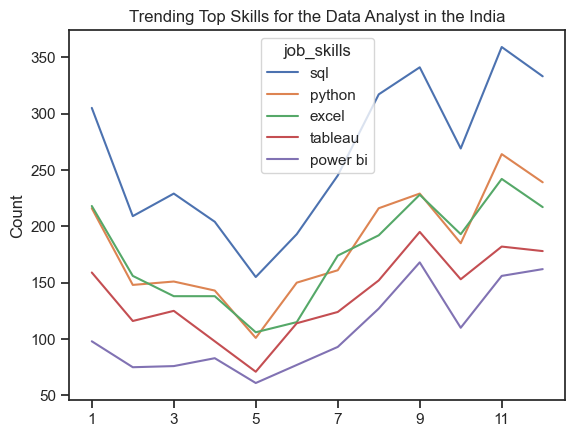

In [88]:
df_DA_IND_pivot.iloc[:, :5].plot(kind='line')

plt.title("Trending Top Skills for the Data Analyst in the India")
plt.xlabel('')
plt.ylabel('Count')
plt.show()

This is good but totals can be misleading without context. 

Percentages clarify relationships within the whole, giving a more accurate comparison.

### Calculate Percentage of Total Jobs
Calculates the total number of entries for each month in `df_DA` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `DA_totals`. This is needed to compute the percentages.

In [89]:
# Get monthly totals
DA_IND_totals = df_DA_IND.groupby('job_posted_month_no').size()

DA_IND_totals

job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the `df_DA_pivot` DataFrame, which contains skill counts, by the monthly totals in `DA_totals` and multiplying by 100. The new DataFrame, `df_DA_pivot_percent`, shows skill distributions as percentages of total monthly job entries.

In [99]:
# divide df_DA_pivot by DA_totals
df_DA_IND_percent = df_DA_IND_pivot.div(DA_IND_totals/100, axis=0)

df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,spark,oracle,word,snowflake,flow,hadoop,sql server,javascript,sap,go,alteryx,java,looker,vba,spss,jira,sheets,gcp,databricks,qlik,mysql,pandas,redshift,ssis,dax,mongodb,bigquery,nosql,pyspark,numpy,...,tidyr,macos,mxnet,digitalocean,ionic,tidyverse,theano,symphony,node,asana,solidity,nuix,julia,wire,electron,laravel,wrike,ruby on rails,vue.js,unreal,workfront,ringcentral,ubuntu,typescript,react.js,fastapi,rshiny,twilio,graphql,groovy,opencv,mariadb,kotlin,powerbi,hugging face,sqlite,clickup,golang,suse,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,4.458599,5.254777,5.891720,3.980892,4.458599,4.936306,4.458599,3.980892,3.503185,3.343949,3.343949,3.821656,3.980892,3.184713,2.866242,3.343949,2.547771,1.433121,1.592357,2.229299,2.229299,1.751592,2.070064,3.025478,1.751592,3.503185,1.751592,1.910828,1.114650,0.796178,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.159236,0.159236,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.159236,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,4.849885,7.621247,5.542725,4.387991,2.771363,6.004619,3.926097,4.157044,4.157044,4.387991,3.926097,2.540416,2.771363,3.464203,3.233256,2.540416,1.847575,1.847575,2.078522,2.078522,3.695150,1.847575,2.078522,2.309469,1.385681,2.771363,3.002309,0.923788,1.385681,1.616628,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.230947,0.00000,0.230947,0.000000,0.00000,0.000000,0.000000,0.230947,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,7.345972,5.450237,6.398104,5.213270,4.028436,4.739336,4.265403,2.132701,4.502370,2.843602,3.791469,4.502370,2.843602,3.080569,0.947867,4.502370,4.028436,3.080569,3.791469,2.606635,3.080569,1.895735,3.317536,1.421801,2.132701,4.739336,2.606635,1.895735,3.080569,0.710900,...,0.236967,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.236967,0.000000,0.000000,0.000000,0.000000,0.236967,0.000000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,6.459330,5.502392,6.459330,2.392344,6.459330,4.306220,6.459330,3.827751,4.306220,5.263158,1.913876,5.023923,2.392344,3.110048,2.153110,3.349282,4.306220,2.153110,3.110048,2.631579,2.392344,1.196172,1.674641,2.392344,2.870813,2.870813,2.870813,2.153110,2.153110,0.956938,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.239234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,5.395683,5.755396,4.676259,5.395683,5.755396,3.956835,3.956835,2.877698,6.115108,2.517986,4.676259,3.956835,3.956835,4.316547,2.517986,1.798561,3.956835,3.237410,2.517986,2.517986,2.158273,2.158273,2.158273,2.517986,2.158273,0.000000,0.359712,1.079137,1.798561,1.079137,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,

In [102]:
# changes month number to month name
df_DA_IND_percent = df_DA_IND_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')
df_DA_IND_percent = df_DA_IND_percent.drop(columns='job_posted_month_no')

df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,spark,oracle,word,snowflake,flow,hadoop,sql server,javascript,sap,go,alteryx,java,looker,vba,spss,jira,sheets,gcp,databricks,qlik,mysql,pandas,redshift,ssis,dax,mongodb,bigquery,nosql,pyspark,numpy,...,tidyr,macos,mxnet,digitalocean,ionic,tidyverse,theano,symphony,node,asana,solidity,nuix,julia,wire,electron,laravel,wrike,ruby on rails,vue.js,unreal,workfront,ringcentral,ubuntu,typescript,react.js,fastapi,rshiny,twilio,graphql,groovy,opencv,mariadb,kotlin,powerbi,hugging face,sqlite,clickup,golang,suse,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,4.458599,5.254777,5.891720,3.980892,4.458599,4.936306,4.458599,3.980892,3.503185,3.343949,3.343949,3.821656,3.980892,3.184713,2.866242,3.343949,2.547771,1.433121,1.592357,2.229299,2.229299,1.751592,2.070064,3.025478,1.751592,3.503185,1.751592,1.910828,1.114650,0.796178,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.159236,0.159236,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.159236,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,4.849885,7.621247,5.542725,4.387991,2.771363,6.004619,3.926097,4.157044,4.157044,4.387991,3.926097,2.540416,2.771363,3.464203,3.233256,2.540416,1.847575,1.847575,2.078522,2.078522,3.695150,1.847575,2.078522,2.309469,1.385681,2.771363,3.002309,0.923788,1.385681,1.616628,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.230947,0.00000,0.230947,0.000000,0.00000,0.000000,0.000000,0.230947,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,7.345972,5.450237,6.398104,5.213270,4.028436,4.739336,4.265403,2.132701,4.502370,2.843602,3.791469,4.502370,2.843602,3.080569,0.947867,4.502370,4.028436,3.080569,3.791469,2.606635,3.080569,1.895735,3.317536,1.421801,2.132701,4.739336,2.606635,1.895735,3.080569,0.710900,...,0.236967,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.236967,0.000000,0.000000,0.000000,0.000000,0.236967,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,6.459330,5.502392,6.459330,2.392344,6.459330,4.306220,6.459330,3.827751,4.306220,5.263158,1.913876,5.023923,2.392344,3.110048,2.153110,3.349282,4.306220,2.153110,3.110048,2.631579,2.392344,1.196172,1.674641,2.392344,2.870813,2.870813,2.870813,2.153110,2.153110,0.956938,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.239234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,5.395683,5.755396,4.676259,5.395683,5.755396,3.956835,3.956835,2.877698,6.115108,2.517986,4.676259,3.956835,3.956835,4.316547,2.517986,1.798561,3.956835,3.237410,2.517986,2.517986,2.158273,2.158273,2.158273,2.517986,2.158273,0.000000,0.359712,1.079137,1.798561,1.079137,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0

### Plot Monthly Skill Demand
Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the `df_DA_pivot_percent` DataFrame. Also the legend is moved outside of the plot for readability.

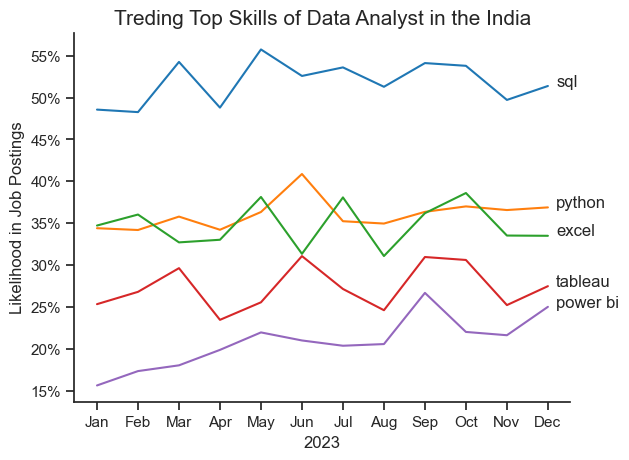

In [127]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_IND_percent.iloc[:, :5]

sns.set_theme(style='ticks')
sns.lineplot(data = df_plot,
             dashes = False,
             palette = 'tab10')
sns.despine()
plt.title("Treding Top Skills of Data Analyst in the India", fontsize=15)
plt.xlabel("2023")
plt.ylabel("Likelihood in Job Postings")
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
plt.show()